In [538]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Loading Data

In [539]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data.columns = columns

# Data Exploration

In [540]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [541]:
data.shape

(302, 14)

In [542]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


**Filling "?" values in ca fileds with mean**

In [543]:
data["ca"].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [544]:
data["ca"] = pd.to_numeric(data["ca"], errors="coerce")
data["ca"].unique()

array([ 3.,  2.,  0.,  1., nan])

In [545]:
data["ca"] = data["ca"].fillna(data["ca"].median())

**Filling "?" values in thal fileds with mean**

In [546]:
data["thal"].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [547]:
data["thal"] = pd.to_numeric(data["thal"], errors="coerce")
data["thal"].unique()

array([ 3.,  7.,  6., nan])

In [548]:
data["thal"] = data["thal"].fillna(data["thal"].median())

**Relace target values**

Modifiy target value to 0 (no disease) and 1 (has disease)
*   0 -> 0
*   1,2,3,4 -> 1

In [549]:
data["target"].unique()

array([2, 1, 0, 3, 4])

In [550]:
data["target"] = data["target"].replace(2, 1)
data["target"] = data["target"].replace(3, 1)
data["target"] = data["target"].replace(4, 1)

In [551]:
data["target"].unique()

array([1, 0])

In [552]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.665563,4.718543,0.460265
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.935142,1.940199,0.499246
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


# Data Analysis

**Correlation**

<AxesSubplot: >

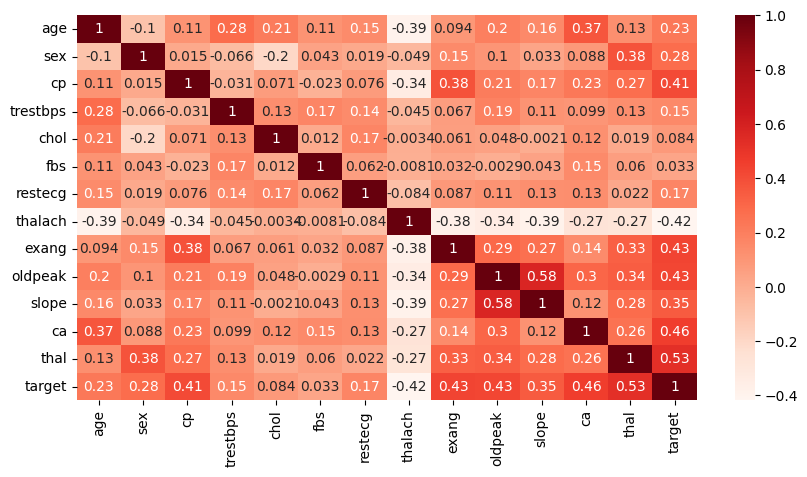

In [553]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, cmap="Reds")

**age plots**

<AxesSubplot: xlabel='age', ylabel='Count'>

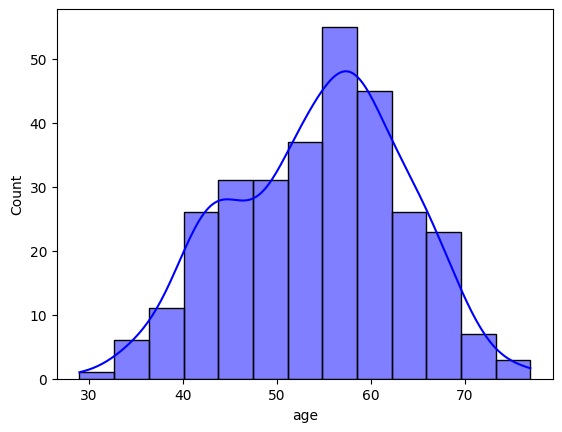

In [554]:
sns.histplot(data=data, x="age", kde=True, color="blue")

[Text(0.5, 1.0, 'age with target')]

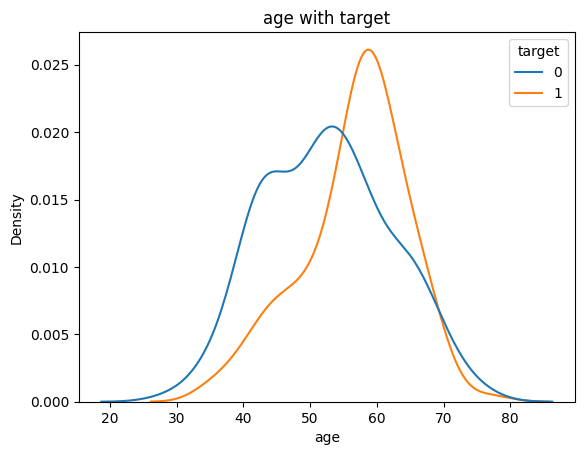

In [555]:
sns.kdeplot(x="age", hue="target", data=data).set(title="age with target")

**sex plots**

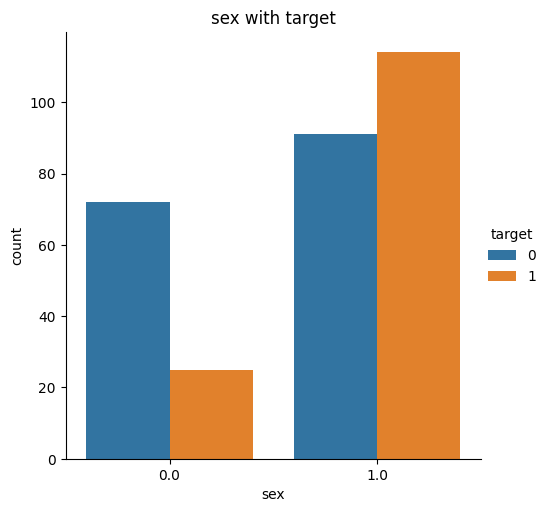

In [556]:
sns.catplot(x="sex", kind="count", hue="target", data=data).set(title="sex with target")

**cp plots**

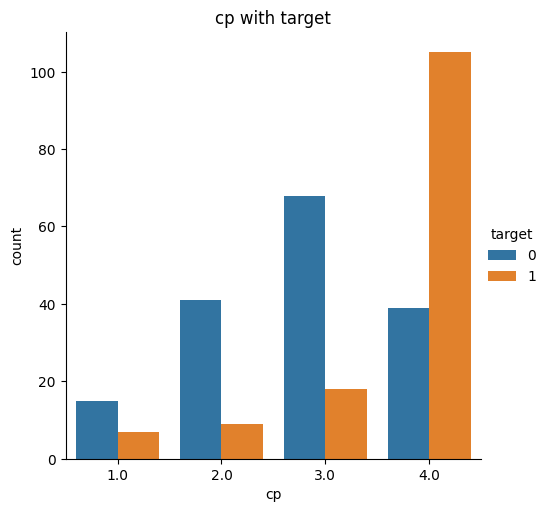

In [557]:
sns.catplot(x="cp", kind="count", hue="target", data=data).set(title="cp with target")

**trestbps plots**

<AxesSubplot: xlabel='trestbps', ylabel='Count'>

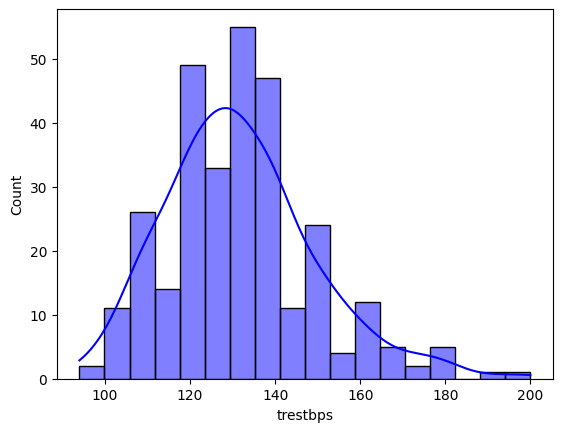

In [558]:
sns.histplot(data=data, x="trestbps", kde=True, color="blue")

[Text(0.5, 1.0, 'trestbps with target')]

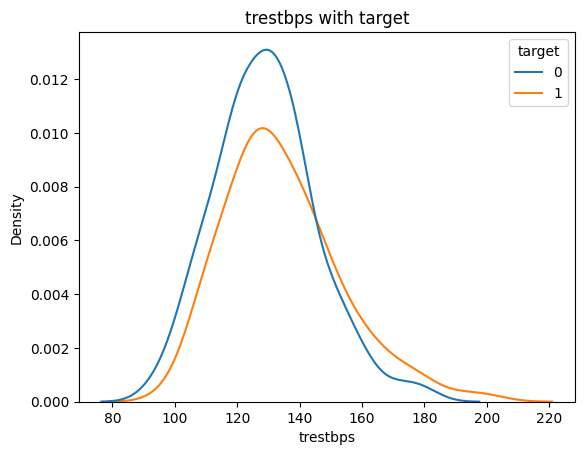

In [559]:
sns.kdeplot(x="trestbps", hue="target", data=data).set(title="trestbps with target")

**chol plots**

<AxesSubplot: xlabel='chol', ylabel='Count'>

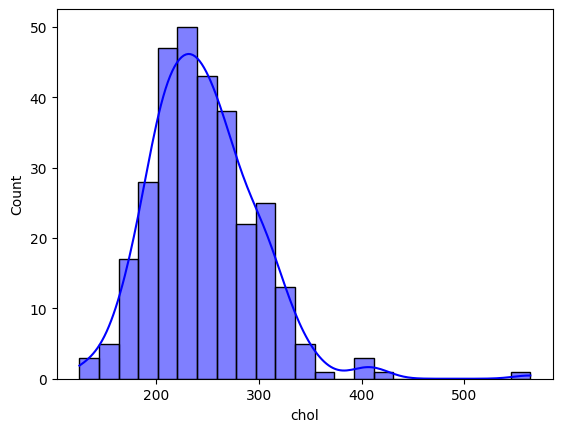

In [560]:
sns.histplot(data=data, x="chol", kde=True, color="blue")

[Text(0.5, 1.0, 'chol with target')]

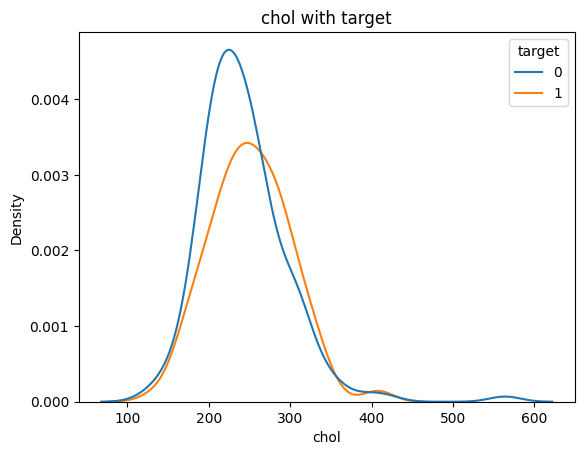

In [561]:
sns.kdeplot(x="chol", hue="target", data=data).set(title="chol with target")

**fbs plots**

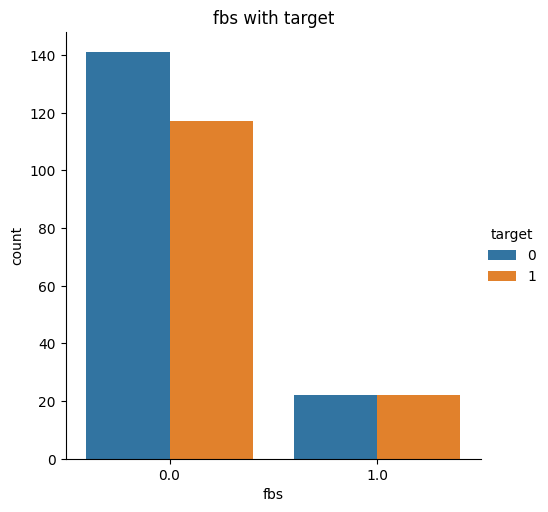

In [562]:
sns.catplot(x="fbs", kind="count", hue="target", data=data).set(title="fbs with target")

**restecg plots**

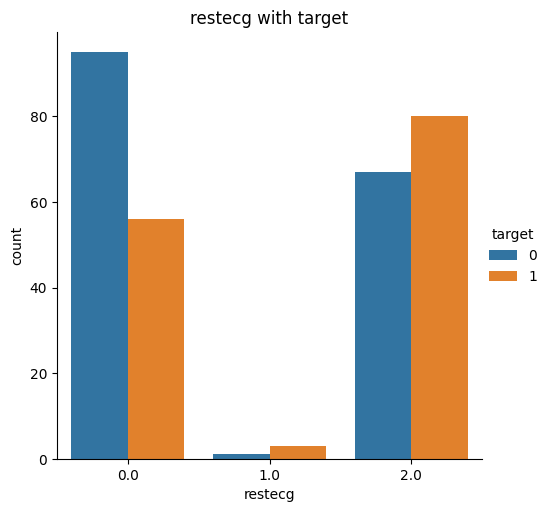

In [563]:
sns.catplot(x="restecg", kind="count", hue="target", data=data).set(title="restecg with target")

**thalach plots**

<AxesSubplot: xlabel='thalach', ylabel='Count'>

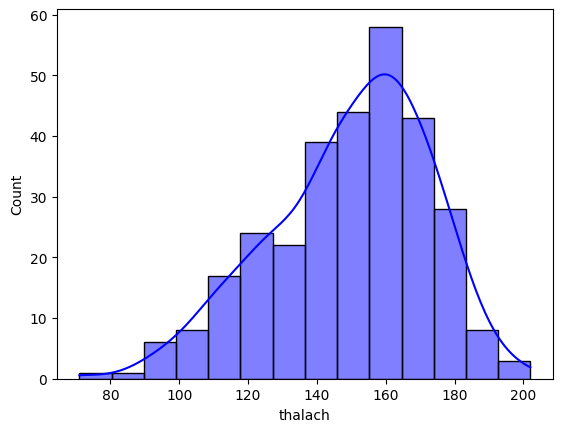

In [564]:
sns.histplot(data=data, x="thalach", kde=True, color="blue")

[Text(0.5, 1.0, 'thalach with target')]

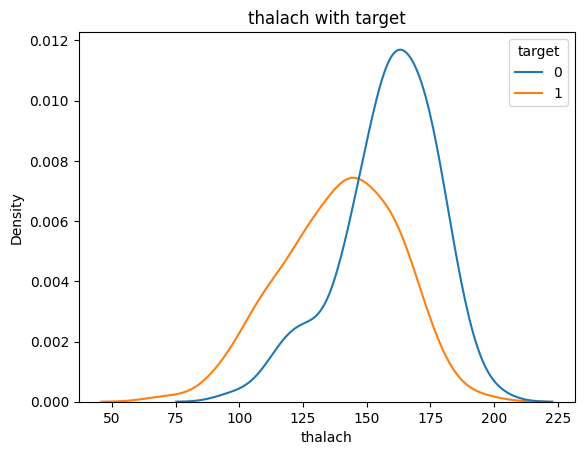

In [565]:
sns.kdeplot(x="thalach", hue="target", data=data).set(title="thalach with target")

**exang plots**

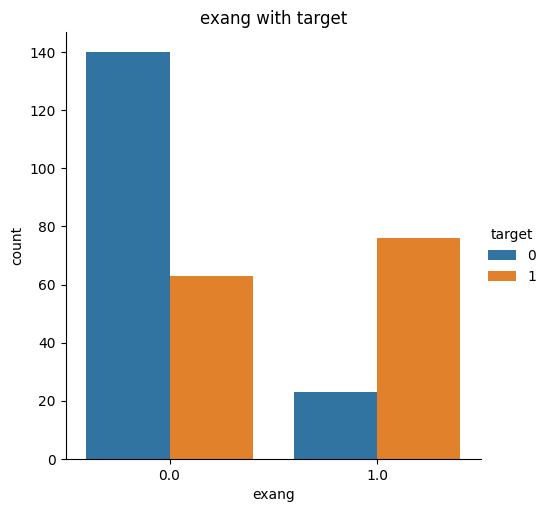

In [566]:
sns.catplot(x="exang", kind="count", hue="target", data=data).set(title="exang with target")

**oldpeak plots**

<AxesSubplot: xlabel='oldpeak', ylabel='Count'>

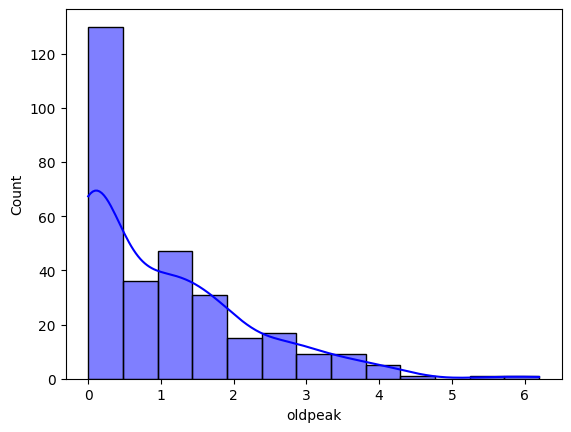

In [567]:
sns.histplot(data=data, x="oldpeak", kde=True, color="blue")

[Text(0.5, 1.0, 'oldpeak with target')]

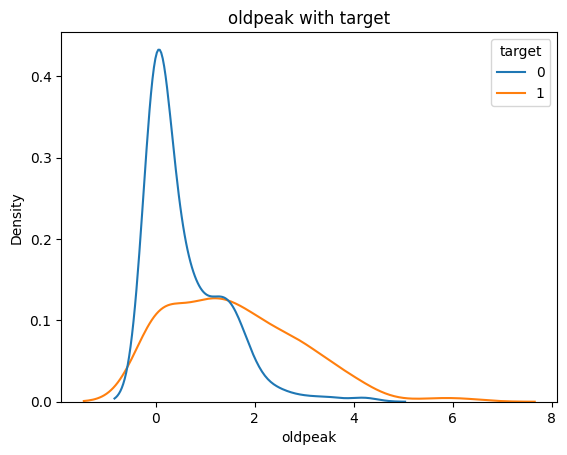

In [568]:
sns.kdeplot(x="oldpeak", hue="target", data=data).set(title="oldpeak with target")

**slope plots**

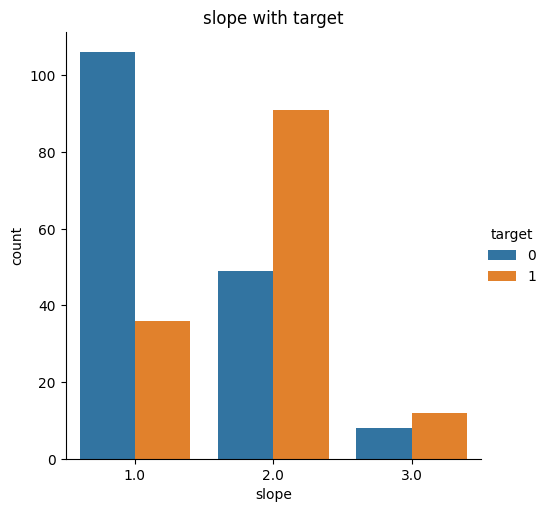

In [569]:
sns.catplot(x="slope", kind="count", hue="target", data=data).set(title="slope with target")

**ca plots**

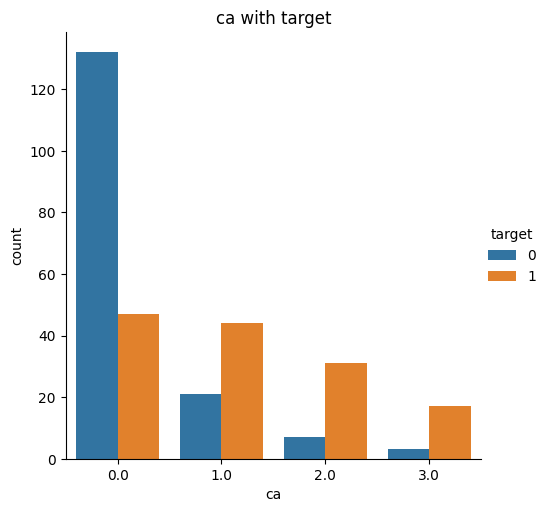

In [570]:
sns.catplot(x="ca", kind="count", hue="target", data=data).set(title="ca with target")

**thal plots**

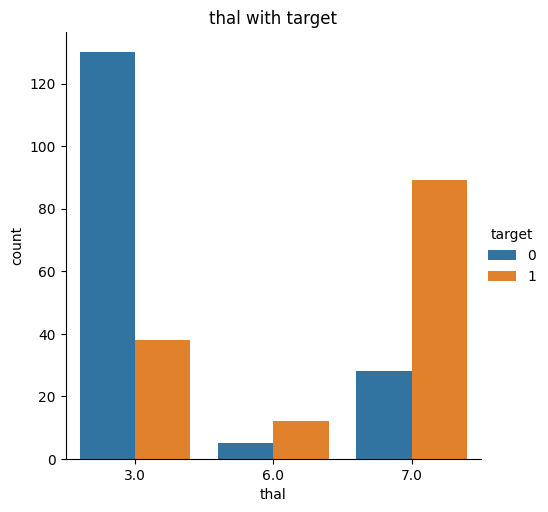

In [571]:
sns.catplot(x="thal", kind="count", hue="target", data=data).set(title="thal with target")

# Data Modeling

In [572]:
y = data["target"]
X = data.drop("target",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [573]:
print("data shape: " + str(data.shape))
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_train shape: " + str(y_train.shape))
print("y_test shape: " + str(y_test.shape))

data shape: (302, 14)
X_train shape: (241, 13)
X_test shape: (61, 13)
y_train shape: (241,)
y_test shape: (61,)


**Logistic Regression**

In [574]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Accuracy of Logistic Regression:",lr_acc_score*100,"%")

Accuracy of Logistic Regression: 88.52459016393442 %


**Support Vector Machine**

In [575]:
svc =  SVC(kernel="rbf", C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,"%")

Accuracy of Support Vector Classifier: 83.60655737704919 %


**Random Forest Classifier**

In [576]:
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Random Forest:",rf_acc_score*100,"%")

Accuracy of Random Forest: 85.24590163934425 %


**Naive Bayes**

In [577]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_acc_score = accuracy_score(y_test, nbpred)
print("Accuracy of Naive Bayes model:",nb_acc_score*100,"%")

Accuracy of Naive Bayes model: 85.24590163934425 %


**K-Nearest Neighbour**

In [578]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,"%")

Accuracy of K-NeighborsClassifier: 81.9672131147541 %


**Extreme Gradient Boost**

In [579]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster="dart", colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,"%")

Accuracy of Extreme Gradient Boost: 86.88524590163934 %
